In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import batman
from astropy.io import fits
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.figsize'] = [12,3]
mpl.rcParams['figure.dpi']     = 300
mpl.rcParams['font.size']      = 18

In [29]:
def plotea(period, t0, title):
    P     = period
    t0    = t0 - 2454833
    phase = (time - t0) / P % 1.0

    phase[phase > 0.5] -= 1

    fig, ax = plt.subplots()
    ax.plot(phase, gpf/gmed, '.k')
    ax.set_xlim(-0.1, 0.1)
    ax.set_ylim(0.98, 1.02)
    ax.set_title(title)
    ax.set_xlabel('Phase')
    ax.set_ylabel('Raw Counts')
    ax.locator_params(axis='y', nbins=5)

In [3]:
def batman_model(time, t0, per, rp, a, inc, ecc):
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t0                      #time of inferior conjunction
    params.per = per                       #orbital period
    params.rp = rp                       #planet radius (in units of stellar radii)
    params.a = a                      #semi-major axis (in units of stellar radii)
    params.inc = inc                      #orbital inclination (in degrees)
    params.ecc = ecc                       #eccentricity
    params.w = 90.                        #longitude of periastron (in degrees)
    params.limb_dark = 'quadratic'        #limb darkening model
    params.u = [0.65, 0.28]               #limb darkening coefficients

    m = batman.TransitModel(params, time) #initializes model
    return m

In [10]:
data = fits.getdata('k2_246199087-kadenza_llc.fits')
time = data['TIME']
eve  = data['EVE_FLUX'][:,1]
gpf  = data['GP_FLUX'][:,1]

gmed = np.nanmedian(gpf)

In [5]:
vj = pd.read_csv('trappist1lc.txt', names=['time', 'flux', 'dflux'], skiprows=1, index_col=False)

(80000, 84000)

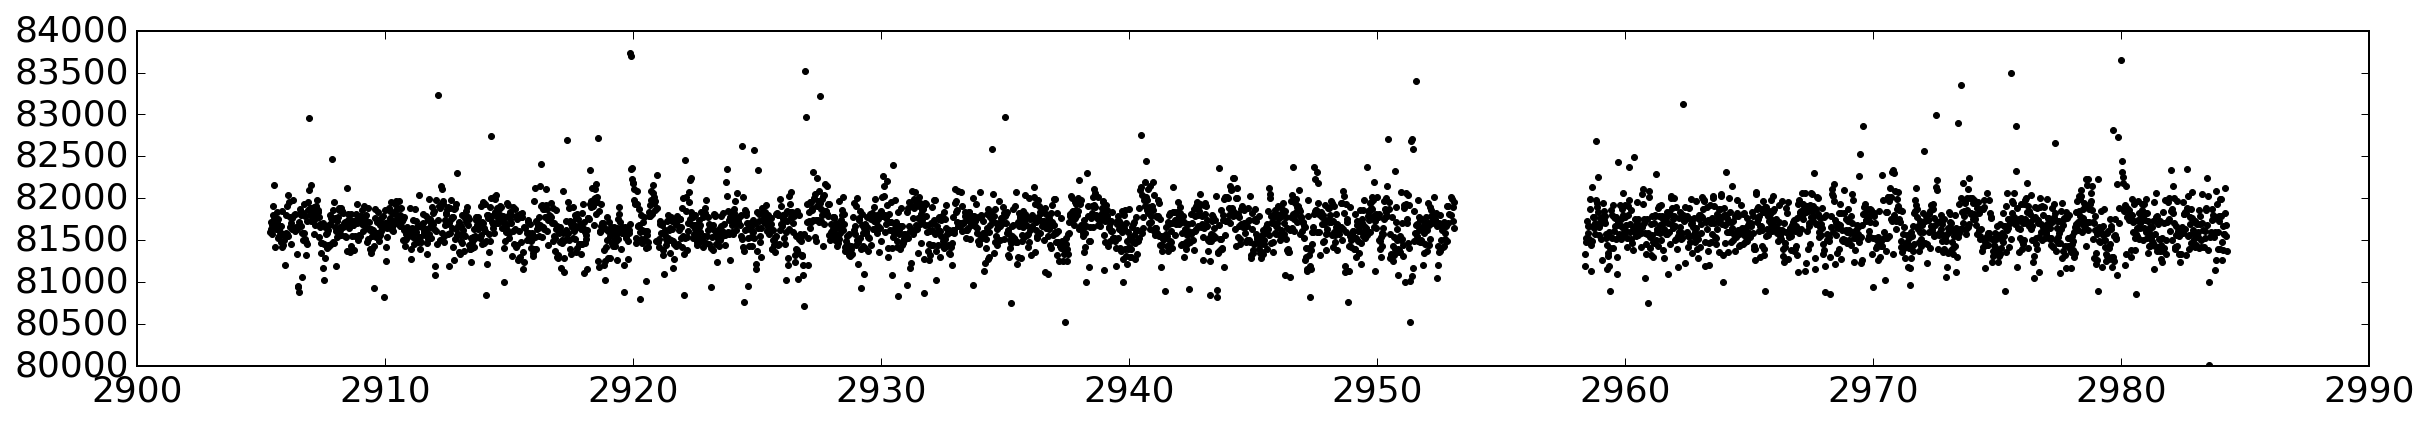

In [36]:
fig, ax = plt.subplots(figsize=[20,3])
ax.plot(time, gpf, '.k')
ax.set_ylim(80000, 84000)


In [37]:
P    = [1.51087081, 2.4218233, 4.049610, 6.099615, 9.206690, 12.35294, 20]
t0   = [2457322.51736, 2457282.80728, 2457670.14165, 2457660.37859, 2457671.39767, 2457665.34937, 2457662.55463]
Rp   = [0.7266]
aR   = [20.50]
inc  = [89.65]
ecc  = [0.081]
name = ['b', 'c', 'd', 'e', 'f', 'g', 'h']

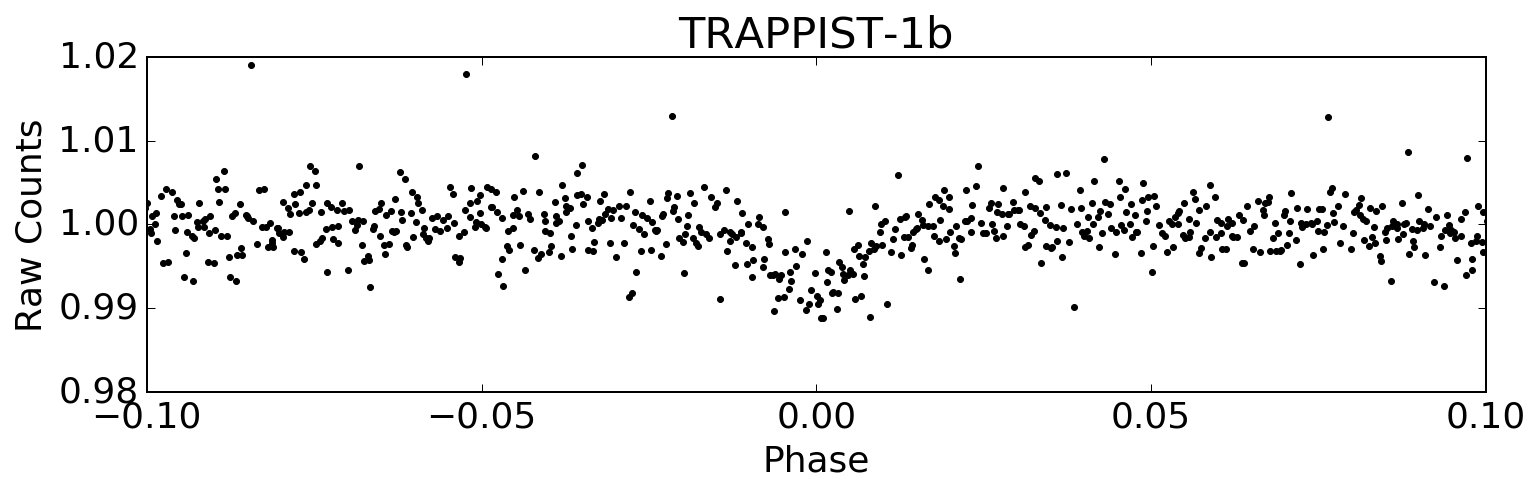

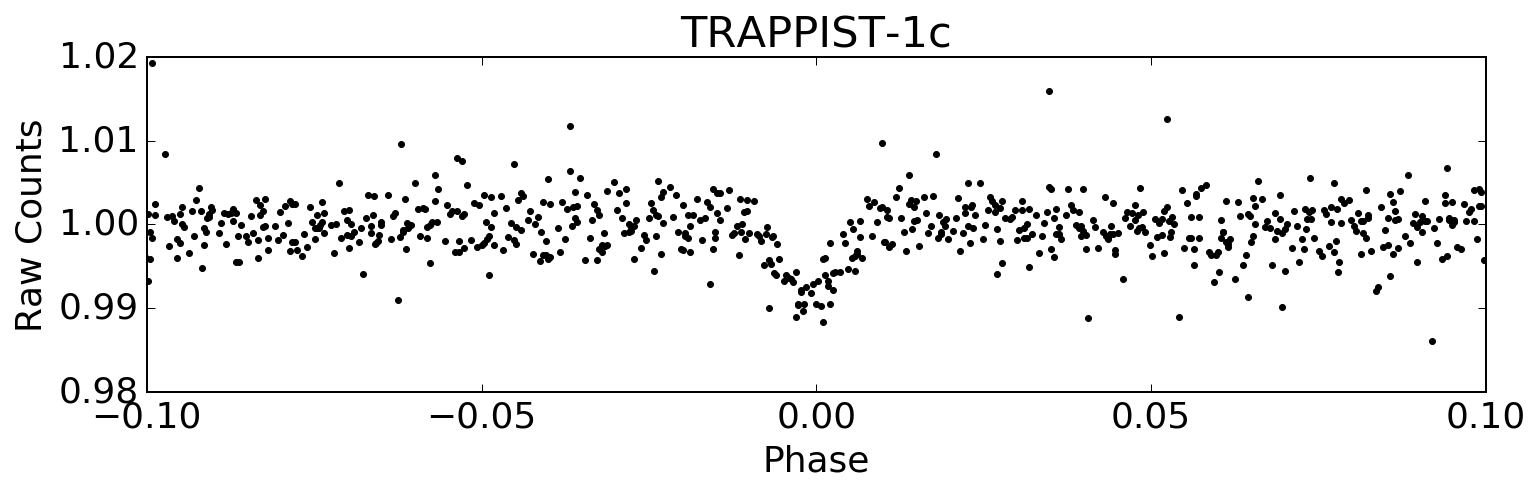

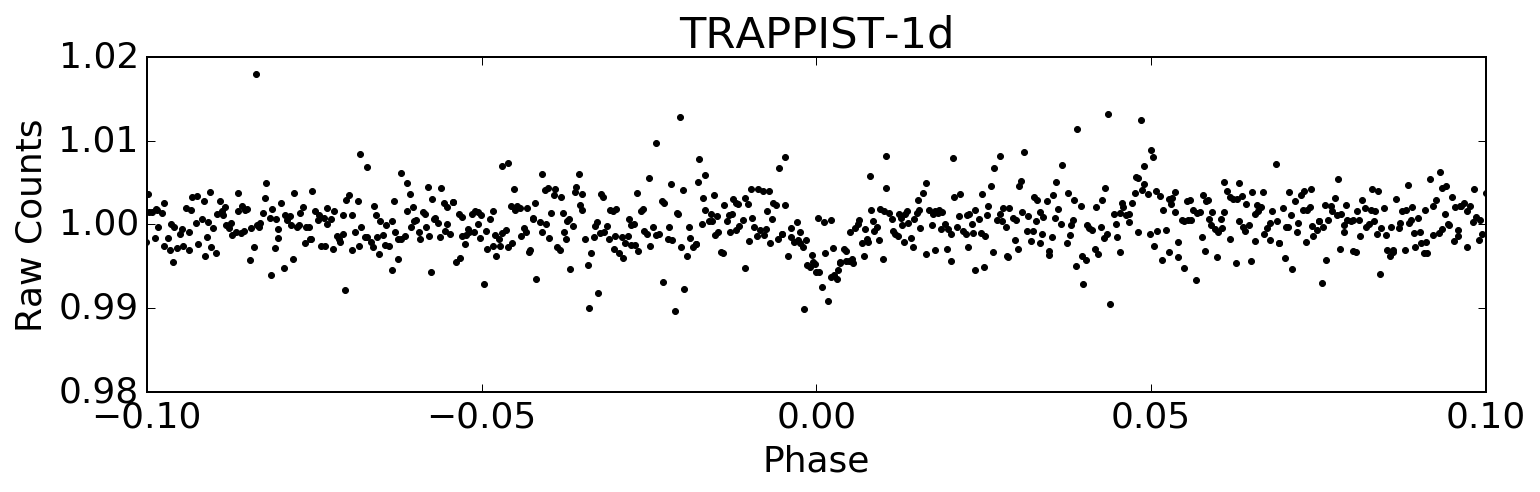

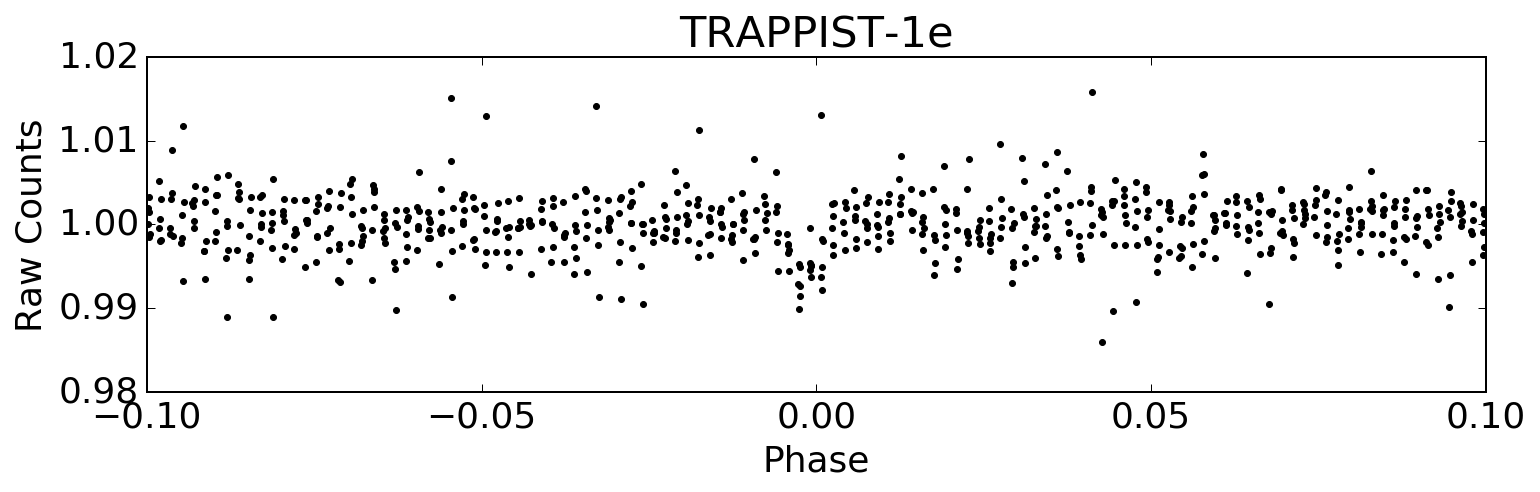

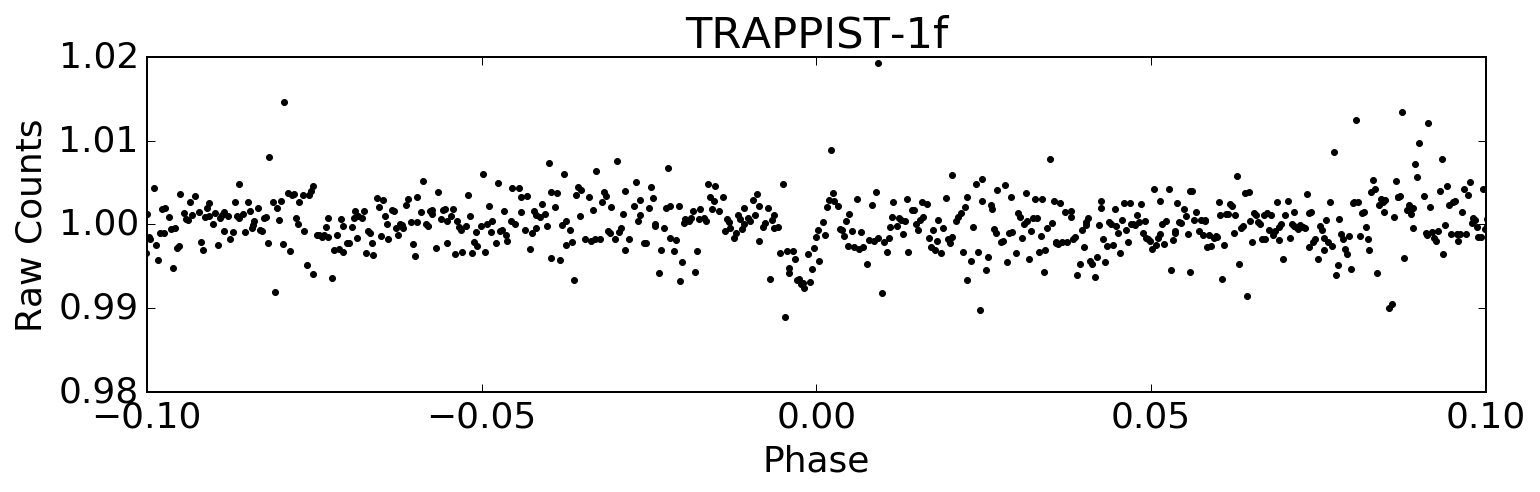

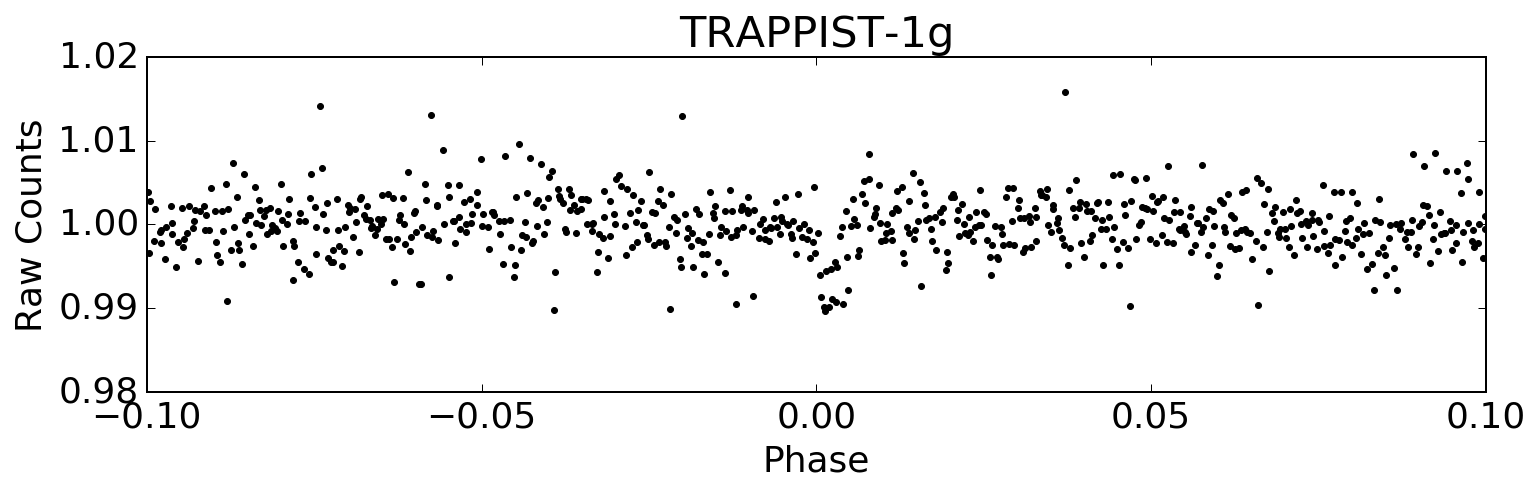

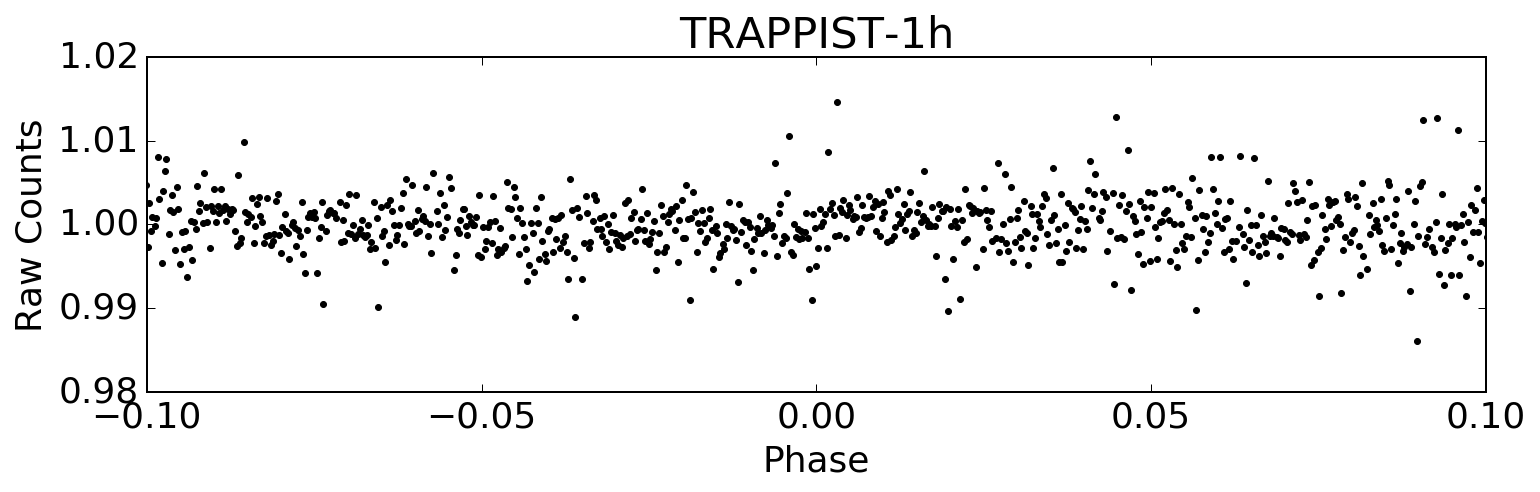

In [39]:
for i in range(len(P)):
    plotea(P[i], t0[i], 'TRAPPIST-1%s' % name[i])